In [2]:
## Import Python libraries ## 

import numpy as np
import xsimlab as xs
import matplotlib.pyplot as plt
import xarray as xr


%matplotlib inline
%reload_ext xsimlab.ipython


import fastscape

from orographic_precipitation.fastscape_ext import precip_model
from fastscape.processes import Bedrock


In [3]:
print('xarray-simlab version: ', xs.__version__)
print('fastscape version: ', fastscape.__version__)

xarray-simlab version:  0.5.0
fastscape version:  0.1.0


In [81]:
## Build xarray-simlab model ##
SouthernAndesLEM = precip_model
SouthernAndesLEM = precip_model.drop_processes(['init_topography'])
SouthernAndesLEM = SouthernAndesLEM.update_processes({'bedrock': Bedrock})

SouthernAndesLEM

<xsimlab.Model (17 processes, 26 inputs)>
grid
    shape                  [in] ('shape_yx',) nb. of grid nodes in ...
    length                 [in] ('shape_yx',) total grid length in ...
boundary
    status                 [in] () or ('border',) node status at bo...
fs_context
uplift
    rate                   [in] () or ('y', 'x') uplift rate
tectonics
surf2erode
diffusion
    diffusivity            [in] () or ('y', 'x') diffusivity (trans...
init_erosion
flow
orographic
    lapse_rate             [in] environmental lapse rate
    lapse_rate_m           [in] moist adiabatic lapse rate
    ref_density            [in] reference saturation water vapor de...
    latitude               [in] latitude
    precip_base            [in] () or ('y', 'x') background, non-or...
    rainfall_frequency  [inout] daily rainfall frequency
    wind_speed             [in] wind speed
    wind_dir               [in] wind direction (azimuth)
    conv_time              [in] conversion time
    fall_time    

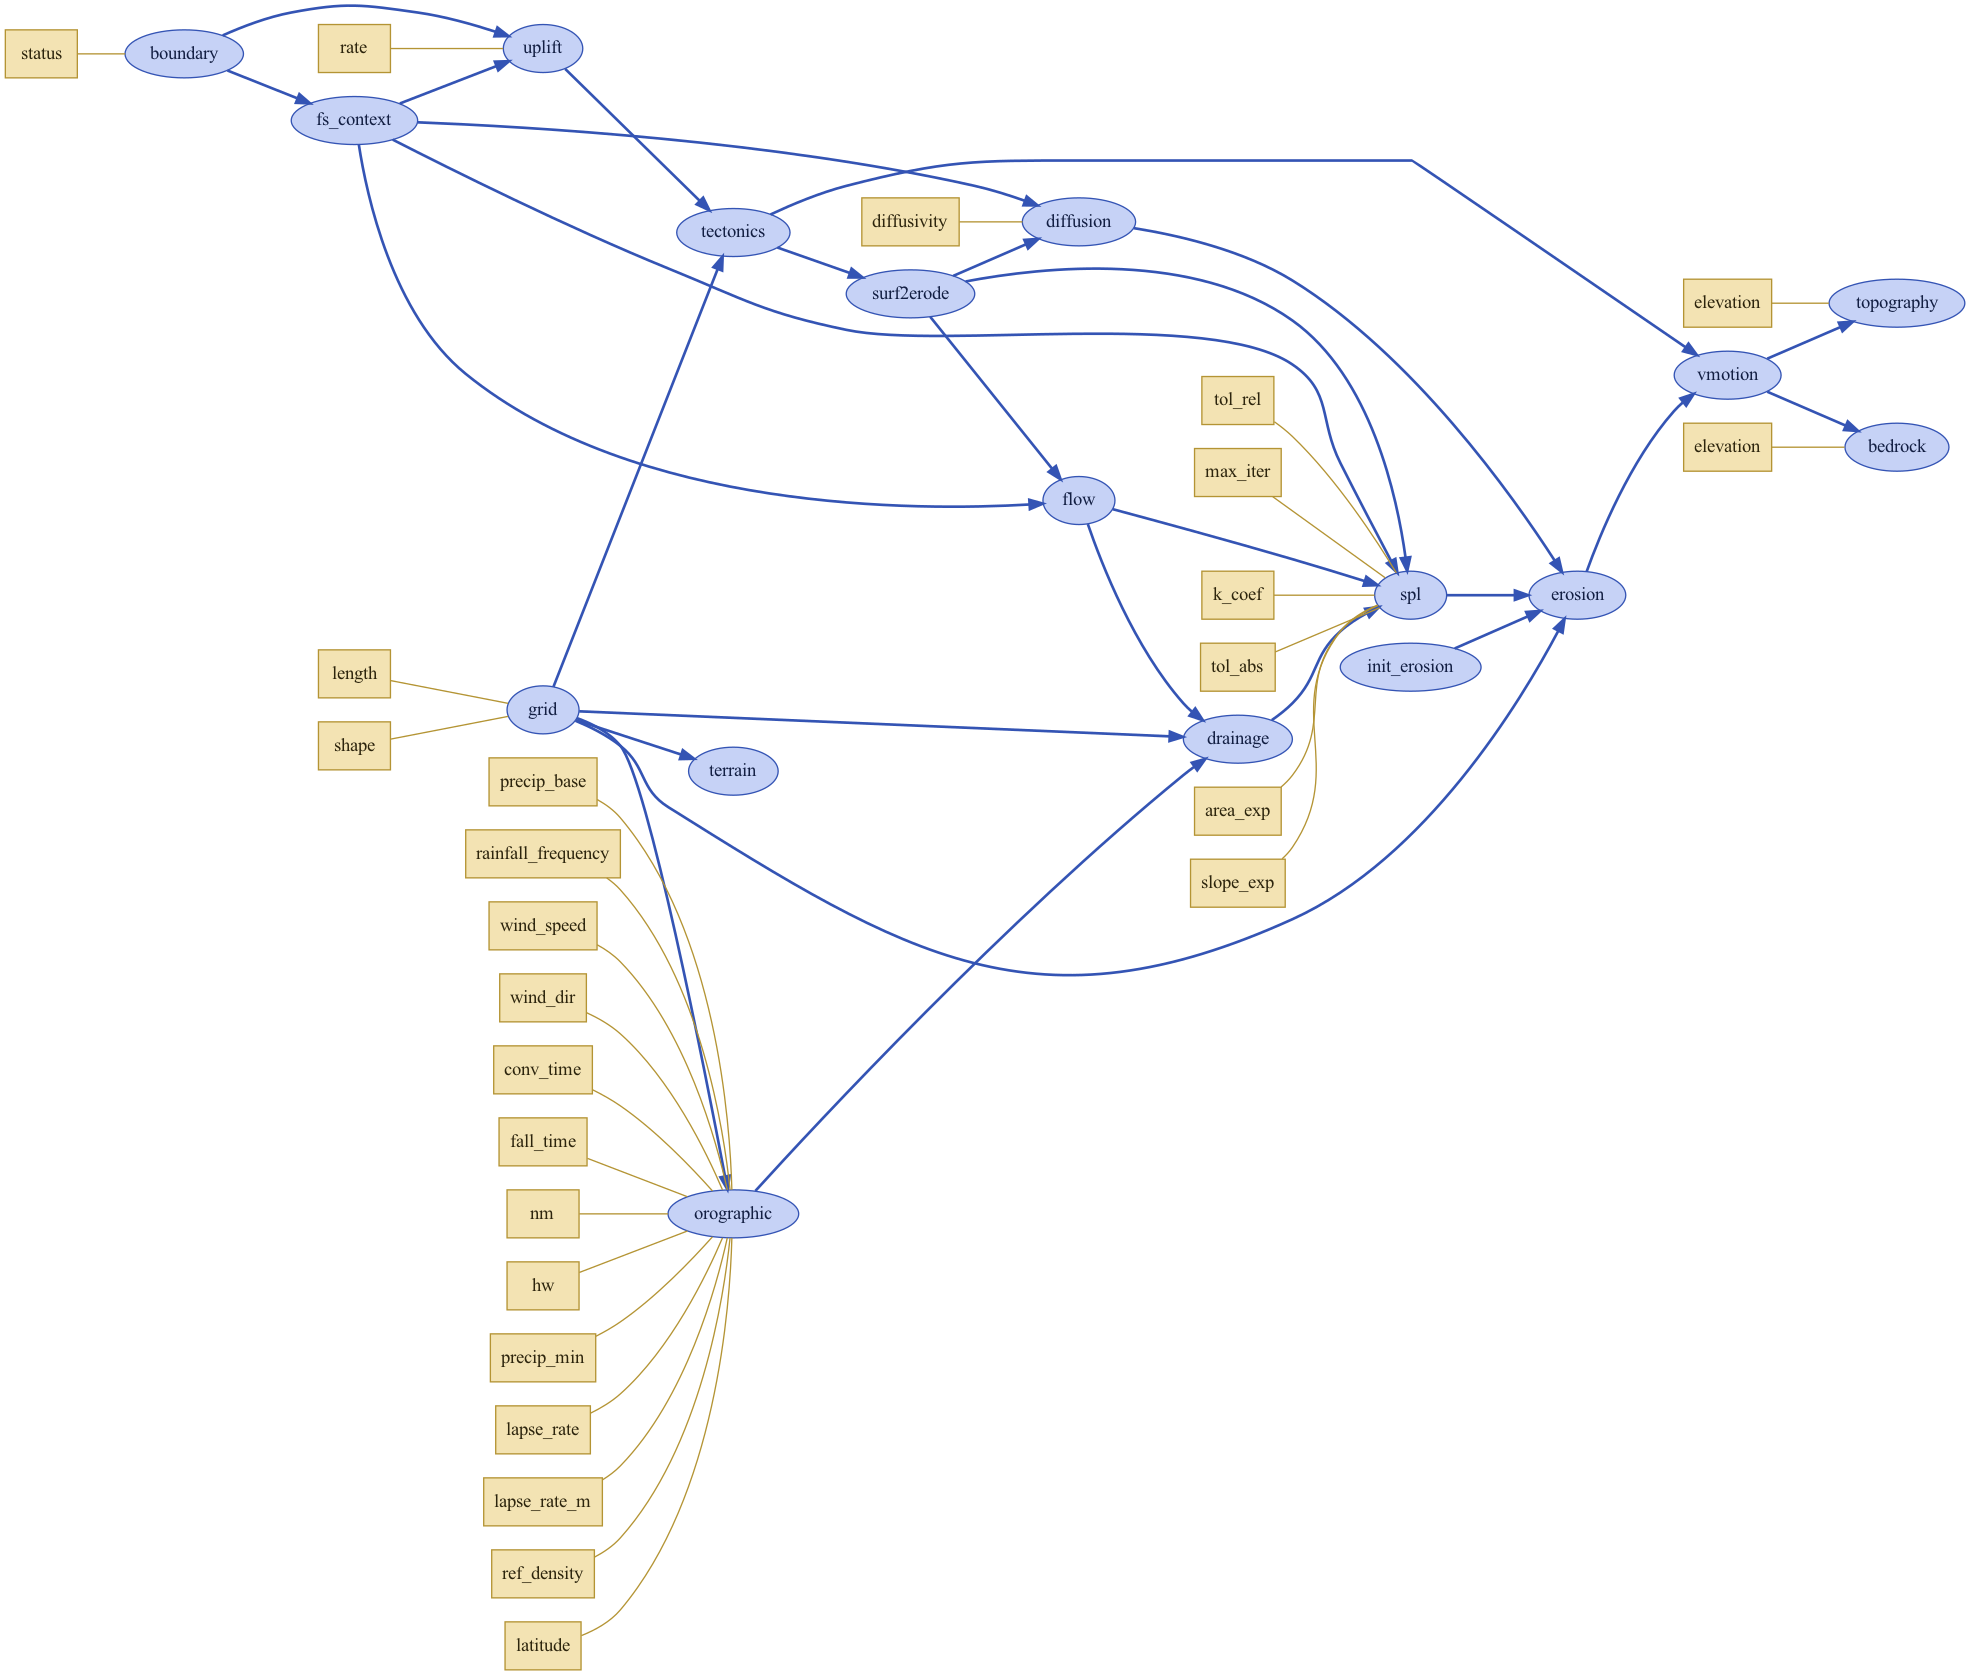

In [82]:
## Visualise xarray-simlab ##
SouthernAndesLEM.visualize(show_inputs='True')

In [102]:
## Model dimensions/grid dimensions ##
nx = 400
ny = 400
nn = nx * ny

xl = 400.e3
yl = 400.e3 

BoundaryCondition = ['looped', 'looped', 'fixed_value', 'fixed_value']

## Model time and time stepping ##
EndTime_1 = 5e6
EndTime_2 = 5e6
EndTime_3 = 8e6
TimeSteps_1 = 10001
TimeSteps_2 = 10001
TimeSteps_3 = 16001

# EndTime = 1e6
# TimeSteps = 1001
ModelTime_1 = np.linspace(0., EndTime_1, TimeSteps_1)
ModelTime_2 = np.linspace(0., EndTime_2, TimeSteps_2)
ModelTime_3 = np.linspace(0., EndTime_3, TimeSteps_3)

PlotStep = 100

## Tectonics ##
k_coef= 2.5e-5
area_exp = 0.4
slope_exp = 1.0
diffusion_diffusivity = 0.

## Background Precipitation ##
precip_base_arr = np.ones([20, 20])
precip_base_arr=precip_base_arr*5
xr_2d = xr.DataArray(np.ones((20,20)), dims=['y','x'])
precip_base_xr=xr_2d*5

## Orographic ##
lapse_rate = -5.8
lapse_rate_m = -6.5 
ref_density = 7.4e-3
rainfall_frequency = 150
latitude = 40
precip_base =  precip_base_xr
wind_speed = 3.5
wind_dir = 270
precip_min = 0.001
conv_time = 1000
fall_time = 1000
nm = 0.005
hw = 5000


## Initial topography ##
WhiteNoiseLevel = 50 # in [m], amplitude of noise

## Seed for Reproducibility ##
RandomSeed = 1410

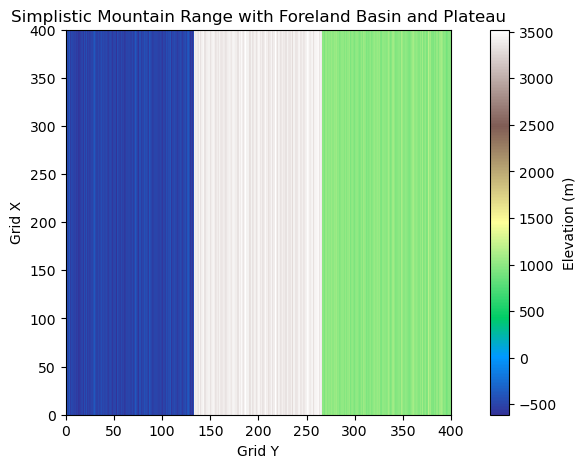

In [106]:
# Define elevation levels
ForelandBasinElevation = -500
MountainRangeElevation = 3400
PlateauElevation = 1000

# Create a synthetic topographic profile
x = np.linspace(0, nx - 1, nx)
TopographyProfile = np.zeros(nx)

# Define regions
ForelandBasinWidth = nx // 3
MountainRangeWidth = nx // 3
PlateauWidth = nx - ForelandBasinWidth - MountainRangeWidth

# Assign elevations to each region
TopographyProfile[:ForelandBasinWidth] = ForelandBasinElevation
TopographyProfile[ForelandBasinWidth:ForelandBasinWidth + MountainRangeWidth] = MountainRangeElevation
TopographyProfile[ForelandBasinWidth + MountainRangeWidth:] = PlateauElevation

# Add noise
np.random.seed(RandomSeed)
Noise = np.random.normal(0, WhiteNoiseLevel, nx)
TopographyProfile = TopographyProfile + Noise

# Expand the profile to a 2D grid
InitialTopography = np.tile(TopographyProfile, (ny, 1))

# Visualize the result
plt.figure(figsize=(10, 5))
plt.imshow(InitialTopography, cmap='terrain', origin='lower', extent=[0, ny, 0, nx])
plt.colorbar(label='Elevation (m)')
plt.title('Simplistic Mountain Range with Foreland Basin and Plateau')
plt.xlabel('Grid Y')
plt.ylabel('Grid X')
plt.show()


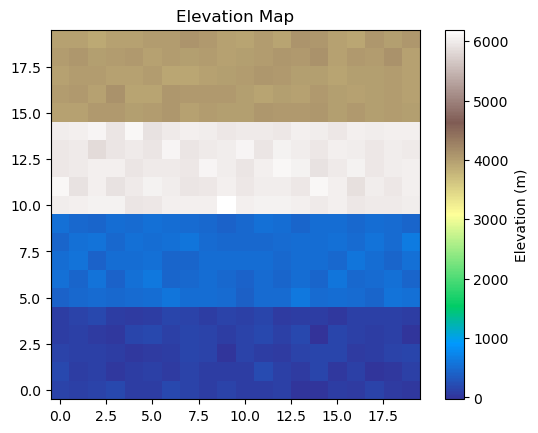

In [109]:
# Total number of nodes
nn = 400  # Example: 400 nodes
InitialTopography = np.zeros(nn)  # Initialize an array to store elevations

# Assign elevations based on node indices
for i in range(nn):
    if 0 <= i < 100:
        InitialTopography[i] = 100  # Elevation of 100 m for nodes 0-99
    elif 100 <= i < 200:
        InitialTopography[i] = 500  # Elevation of 500 m for nodes 100-199
    elif 200 <= i < 300:
        InitialTopography[i] = 6000  # Elevation of 6000 m for nodes 200-299
    elif 300 <= i < 400:
        InitialTopography[i] = 4000  # Elevation of 4000 m for nodes 300-399

# Assign elevations using slicing
InitialTopography[0:100] = 100    # Elevation of 100 m for nodes 0-99
InitialTopography[100:200] = 500  # Elevation of 500 m for nodes 100-199
InitialTopography[200:300] = 6000 # Elevation of 6000 m for nodes 200-299
InitialTopography[300:400] = 4000 # Elevation of 4000 m for nodes 300-399

# Assign elevations using slicing
InitialTopography[0:100] = 100    # Elevation of 100 m for nodes 0-99
InitialTopography[100:200] = 500  # Elevation of 500 m for nodes 100-199
InitialTopography[200:300] = 6000 # Elevation of 6000 m for nodes 200-299
InitialTopography[300:400] = 4000 # Elevation of 4000 m for nodes 300-399

# Adding random noise to the elevations
np.random.seed(42)  # For reproducibility
WhiteNoiseLevel = 50  # Standard deviation of noise

Noise = np.random.normal(0, WhiteNoiseLevel, nn)
InitialTopography += Noise  # Add noise to the elevations

# Reshape into a 2D grid for visualization
nx, ny = 20, 20  # Example: 20x20 grid
InitialTopography2D = InitialTopography.reshape(nx, ny)

# Plotting
import matplotlib.pyplot as plt
plt.imshow(InitialTopography2D, cmap='terrain', origin='lower')
plt.colorbar(label='Elevation (m)')
plt.title('Elevation Map')
plt.show()


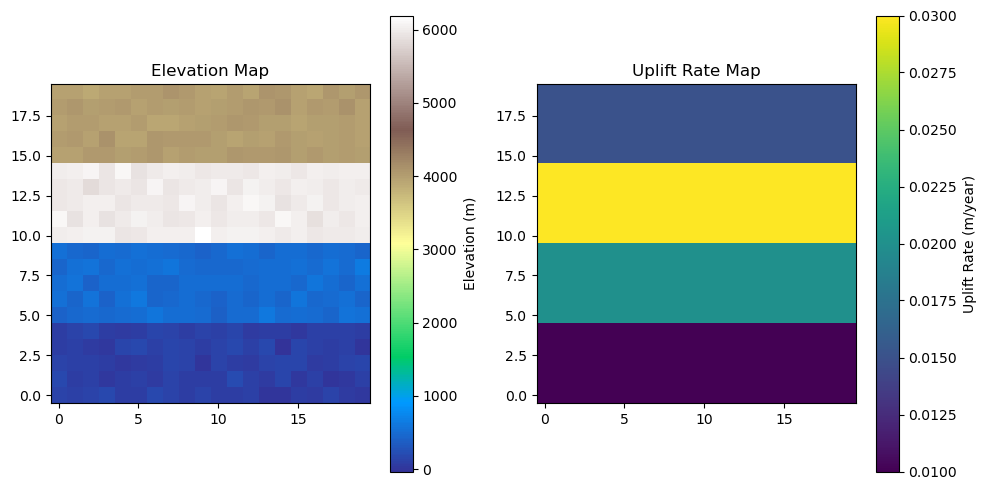

In [111]:
# Define first stage uplift rates for each region
UpliftRates = np.zeros(nn)  # Initialize uplift rates array
UpliftRates[0:100] = 0.01    # Uplift rate for nodes 0-99 (e.g., 0.01 m/year)
UpliftRates[100:200] = 0.02  # Uplift rate for nodes 100-199 (e.g., 0.02 m/year)
UpliftRates[200:300] = 0.03  # Uplift rate for nodes 200-299 (e.g., 0.03 m/year)
UpliftRates[300:400] = 0.015 # Uplift rate for nodes 300-399 (e.g., 0.015 m/year)

# Reshape into a 2D grid for visualization
nx, ny = 20, 20  # Example: 20x20 grid
InitialTopography2D = InitialTopography.reshape(nx, ny)
UpliftRates2D = UpliftRates.reshape(nx, ny)

# Plotting the elevation map
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(InitialTopography2D, cmap='terrain', origin='lower')
plt.colorbar(label='Elevation (m)')
plt.title('Elevation Map')

# Plotting the uplift rate map
plt.subplot(1, 2, 2)
plt.imshow(UpliftRates2D, cmap='viridis', origin='lower')
plt.colorbar(label='Uplift Rate (m/year)')
plt.title('Uplift Rate Map')

plt.tight_layout()
plt.show()

In [112]:
## Set up input parameters for xarray-simlab model ##
in_ds_S1 = xs.create_setup(
    model = SouthernAndesLEM,
    clocks={
        'time': ModelTime_1,
        'output': ModelTime_1[::PlotStep]
    },
    master_clock='time',
    input_vars={
        'grid': {
            'shape': [nx, ny],
            'length': [xl, yl],
        },
         'boundary': {
            'status': BoundaryCondition
        },
        'topography': {
            'elevation': InitialTopography2D,
        },
        'bedrock': {
            'elevation': InitialTopography2D,
        },
        'uplift': {
            'rate': UpliftRates2D,
        },
        'spl': {
            'k_coef': k_coef,
            'area_exp': area_exp,
            'slope_exp': slope_exp,
        },
        'diffusion': {
            'diffusivity': diffusion_diffusivity,
        },
        'orographic': {
            'lapse_rate': lapse_rate,
            'lapse_rate_m': lapse_rate_m,
            'ref_density': ref_density, 
            'rainfall_frequency': rainfall_frequency,
            'latitude': latitude,
            'precip_base': precip_base_xr,  
            'wind_speed': wind_speed,   
            'wind_dir': wind_dir,
            'precip_min': precip_min,  
            'conv_time': conv_time,            
            'fall_time': fall_time,         
            'nm': nm,                                
            'hw': hw,
        },
    },
    output_vars={
        'topography__elevation': 'time',
        'orographic__precip_rate': 'time'
    }
)

in_ds_S1

<xarray.Dataset>
Dimensions:                         (time: 10001, output: 101, shape_yx: 2,
                                     border: 4, y: 20, x: 20)
Coordinates:
  * time                            (time) float64 0.0 500.0 ... 5e+06 5e+06
  * output                          (output) float64 0.0 5e+04 ... 5e+06
Dimensions without coordinates: shape_yx, border, y, x
Data variables: (12/26)
    spl__tol_rel                    float64 0.0001
    spl__tol_abs                    float64 0.0001
    spl__max_iter                   int64 100
    grid__shape                     (shape_yx) int64 20 20
    grid__length                    (shape_yx) float64 4e+05 4e+05
    boundary__status                (border) <U11 'looped' ... 'fixed_value'
    ...                              ...
    orographic__wind_dir            int64 270
    orographic__precip_min          float64 0.001
    orographic__conv_time           int64 1000
    orographic__fall_time           int64 1000
    orographic__nm                  float64 0.005
    orographic__hw                  int64 5000

In [113]:
with xs.monitoring.ProgressBar():
    out_ds_S1 = in_ds_S1.xsimlab.run(model=SouthernAndesLEM)
    
out_ds_S1

             0% | initialize 

<xarray.Dataset>
Dimensions:                         (y: 20, x: 20, border: 4, shape_yx: 2,
                                     time: 10001, output: 101)
Coordinates:
  * border                          (border) object 'left' 'right' ... 'bottom'
  * output                          (output) float64 0.0 5e+04 ... 5e+06
  * time                            (time) float64 0.0 500.0 ... 5e+06 5e+06
  * x                               (x) float64 0.0 2.105e+04 ... 4e+05
  * y                               (y) float64 0.0 2.105e+04 ... 4e+05
Dimensions without coordinates: shape_yx
Data variables: (12/27)
    bedrock__elevation              (y, x) float64 124.8 93.09 ... 4.062e+03
    boundary__status                (border) <U11 'looped' ... 'fixed_value'
    diffusion__diffusivity          float64 0.0
    grid__length                    (shape_yx) float64 4e+05 4e+05
    grid__shape                     (shape_yx) int64 20 20
    orographic__conv_time           int64 1000
    ...                              ...
    spl__max_iter                   int64 100
    spl__slope_exp                  float64 1.0
    spl__tol_abs                    float64 0.0001
    spl__tol_rel                    float64 0.0001
    topography__elevation           (time, y, x) float64 124.8 ... 4.062e+03
    uplift__rate                    (y, x) float64 0.01 0.01 ... 0.015 0.015

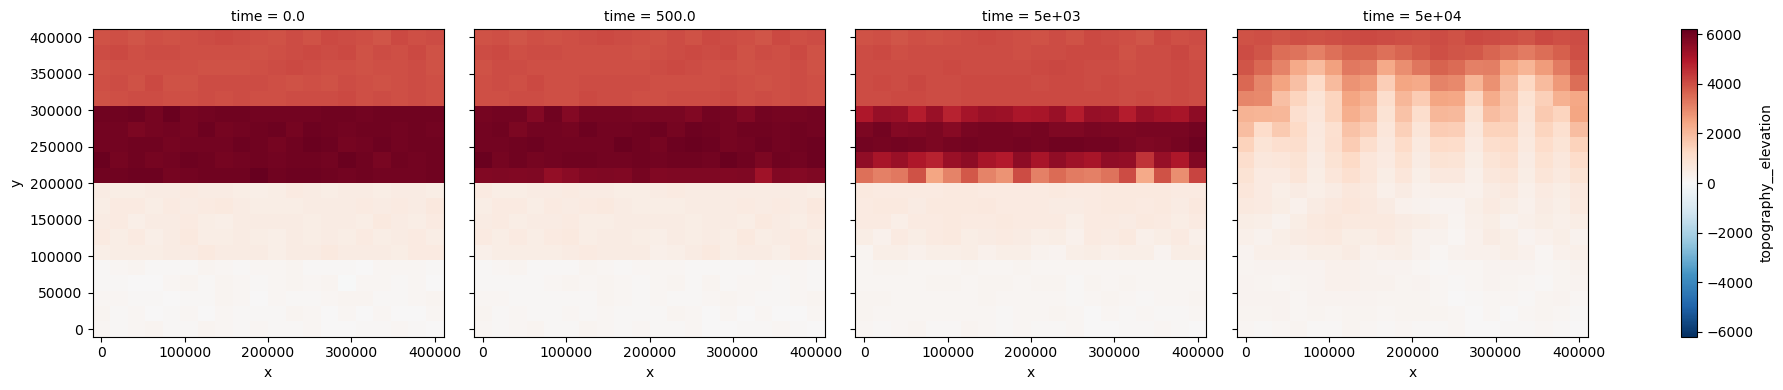

In [124]:
out_ds_S1.topography__elevation.isel(time=[0,1,10,100]).plot(col='time',figsize=(20, 4))
plt.show()

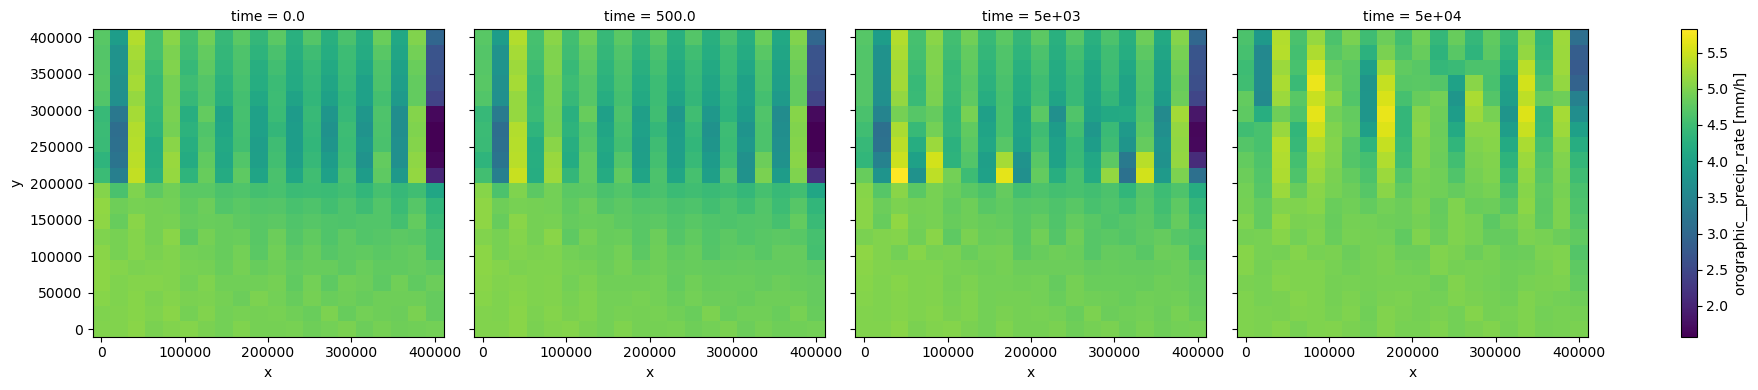

In [128]:
out_ds_S1.orographic__precip_rate.isel(time=[0,1,10,100]).plot(col='time',figsize=(20, 4))
plt.show()